In [156]:
from collections import defaultdict
from scipy.ndimage import gaussian_filter, binary_erosion

def left_border_pixel(array, pos):
    return array[pos[0], pos[1]-1] == 0

def right_border_pixel(array, pos):
    return array[pos[0], pos[1]+1] == 0

def top_border_pixel(array, pos):
    return array[pos[0]-1, pos[1]] == 0

def bottom_border_pixel(array, pos):
    return array[pos[0]+1, pos[1]] == 0

def get_outline(array, corners_only = False):
    outline = np.logical_xor(array,binary_erosion(array))

    where = np.array(np.where(outline))
    edge_type = defaultdict(dict)
    coord = []
    for y, x in where.T:
        assert array[y,x] == True
        l = left_border_pixel(array, [y,x])
        r = right_border_pixel(array, [y,x])
        t = top_border_pixel(array, [y,x])
        b = bottom_border_pixel(array, [y,x])
        tl = t and l#upper left corner
        tr = t and r
        bl = b and l
        br = b and r
        if tl:
            edge_type[y][x] = ("tl")
        elif tr:
            edge_type[y][x] = ("tr")
        elif bl:
            edge_type[y][x] = ("bl")
        elif br:
            edge_type[y][x] = ("br")
        elif l:
            edge_type[y][x] = ("l")
        elif r:
            edge_type[y][x] = ("r")
        elif t:
            edge_type[y][x] = ("t")
        elif b:
            edge_type[y][x] = ("b")
        
    trace = []
    y, x = where.T[0]
    while True:
        outline[y,x] = 0
        edge = edge_type[y][x]
        
        if edge == "tl":
            trace.append([y,x-0.5])
            trace.append([y-0.5,x-0.5])#corner
            trace.append([y-0.5,x])
            trace.append([y-0.5,x+0.5])

        elif edge == "tr":
            trace.append([y-0.5,x])
            trace.append([y-0.5,x+0.5])#corner
            trace.append([y,x+0.5])
            trace.append([y+0.5,x+0.5])

        elif edge == "bl":
            trace.append([y+0.5,x])
            trace.append([y+0.5,x-0.5])#corner
            trace.append([y,x-0.5])
            trace.append([y-0.5,x-0.5])


        elif edge == "br":
            trace.append([y,x+0.5])
            trace.append([y+0.5,x+0.5])#corner
            trace.append([y+0.5,x])
            trace.append([y+0.5,x-0.5])

            
        if not corners_only:
            if edge == "l":
                trace.append([y,x-0.5])#central left
                trace.append([y-0.5,x-0.5])

            elif edge == "r":
                trace.append([y,x+0.5])#central right
                trace.append([y+0.5,x+0.5])
            elif edge == "t":
                trace.append([y-0.5,x])#central top
                trace.append([y-0.5,x+0.5])
            elif edge == "b":
                trace.append([y+0.5,x])#central bottom
                trace.append([y+0.5,x-0.5])


        #Search for neighborig pixel
        if outline[y-1,x] == 1:#prefer going up
            y, x = [y-1,x]
            outline[y,x] = 0
            continue
        if outline[y-1,x+1] == 1:#prefer going up right
            y, x = [y-1,x+1]
            outline[y,x] = 0
            continue
        if outline[y,x+1] == 1:#prefer going right otherwise
            y, x = [y,x+1]
            outline[y,x] = 0
            continue
        if outline[y+1,x+1] == 1:#prefer going right down otherwise
            y, x = [y+1,x+1]
            outline[y,x] = 0
            continue
        if outline[y+1,x] == 1:#prefer going down otherwise
            y, x = [y+1,x]
            outline[y,x] = 0
            continue
        if outline[y+1,x-1] == 1:#prefer going down left otherwise
            y, x = [y+1,x-1]
            outline[y,x] = 0
            continue
        if outline[y,x-1] == 1:#prefer going left otherwise
            y, x = [y,x-1]
            outline[y,x] = 0
            continue
        if outline[y-1,x-1] == 1:#prefer left up
            y, x = [y-1,x-1]
            outline[y,x] = 0
            continue
        break#no neighboring pixel, nowhere to go            

    trace.append(trace[0])
    trace = np.array(trace).T
    y = trace[0]
    x = trace[1]
    return x, y

# Test get outline

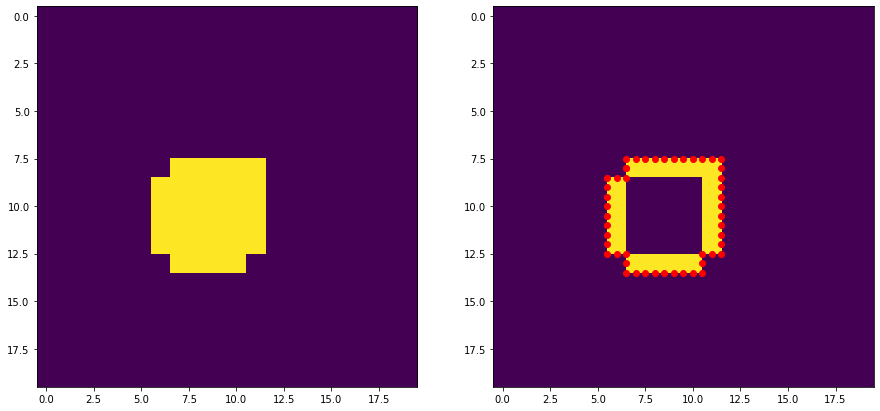

In [155]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[13,6]= 0

x, y = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
plt.scatter(x, y, color ="r")